# Import Lib

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error 
import seaborn as sns
import seaborn as sns
import datetime
import time
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
cd E:\Data Sci\Machince_Langauage\Ass

E:\Data Sci\Machince_Langauage\Ass


1) load the given dataset

In [3]:
data = pd.read_csv("Ass-5.csv")

In [4]:
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,124365,Male,Loyal Customer,50,Business travel,Business,3599,3,3,...,5,5,5,5,5,5,4,12,24.0,satisfied
9996,9996,22044,Male,Loyal Customer,38,Business travel,Business,3873,5,5,...,4,4,4,4,3,4,5,0,0.0,satisfied
9997,9997,14057,Female,Loyal Customer,39,Business travel,Business,319,4,4,...,4,4,4,4,3,4,2,0,0.0,satisfied
9998,9998,113848,Male,Loyal Customer,52,Business travel,Business,1363,5,5,...,4,4,3,4,5,4,5,1,11.0,satisfied


2) print all the column names.

In [6]:
data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

3) describe the data 

In [8]:
data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9974.000000
mean,4999.50000,64950.978500,39.303700,1198.823800,2.731500,3.038900,2.753600,2.96890,3.208800,3.240300,3.411300,3.335500,3.366000,3.346500,3.619900,3.285600,3.627400,3.268200,14.785400,15.242130
std,2886.89568,37420.905082,15.116478,1001.774138,1.328226,1.528077,1.403241,1.28425,1.339769,1.350755,1.326012,1.340567,1.288336,1.311415,1.190028,1.269013,1.181401,1.321077,38.217509,38.810195
min,0.00000,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2499.75000,32330.500000,27.000000,413.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,4999.50000,64941.000000,40.000000,852.500000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,7499.25000,97579.750000,51.000000,1747.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,9999.00000,129863.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


4) Drop the column ‘Unnamed’

In [11]:
data = data.drop(["Unnamed: 0"],axis = 1)

5) Replace all the “ “ in column with “_”.

In [13]:
data.columns=[each.replace(" ","_") for each in data.columns]

In [14]:
data.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

6) Plot the number of satisfied customers and the number of unsatisfied customers.

In [16]:
data["satisfaction"].value_counts()

neutral or dissatisfied    5689
satisfied                  4311
Name: satisfaction, dtype: int64

<AxesSubplot:>

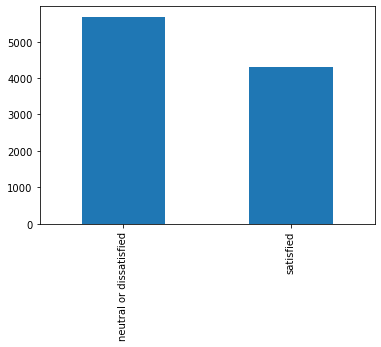

In [17]:
data["satisfaction"].value_counts().plot(kind='bar')

7) Plot the mean value of satisfaction of male and female customer

In [19]:
#Label Encoding for the Satisfication
data["satisfaction"] = [1 if each=="satisfied" else 0 for each in data.satisfaction]

In [23]:
data[["Gender","satisfaction"]].groupby(["Gender"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Gender,satisfaction
1,Male,0.438062
0,Female,0.424432


<AxesSubplot:>

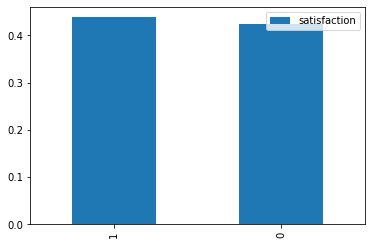

In [22]:
data[["Gender","satisfaction"]].groupby(["Gender"],as_index=False).mean().sort_values(by="satisfaction",ascending=False).plot(kind= 'bar')

8) Plot the mean value of satisfaction of customers with respect to Age.

In [25]:
data[["Age","satisfaction"]].groupby(["Age"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Age,satisfaction
71,79,0.666667
39,46,0.643192
34,41,0.632743
38,45,0.608466
66,73,0.600000
...,...,...
7,14,0.076923
0,7,0.071429
59,66,0.050000
69,76,0.000000


9) Plot the mean value of satisfaction of customers with respect to Food_and_drink.

In [27]:
data1 = data[["Food_and_drink","satisfaction"]].groupby(["Food_and_drink"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

In [30]:
data1

,Food_and_drink,satisfaction
0,0,0.625000
5,5,0.566176
4,4,0.515050
3,3,0.404990
2,2,0.362305
1,1,0.198142


<AxesSubplot:>

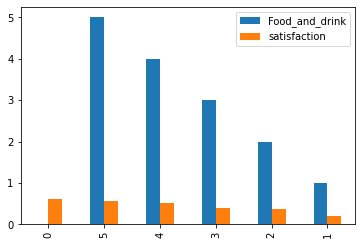

In [37]:
data1.plot(kind = "bar")

10) Display a boxplot for Flight_Distance

<AxesSubplot:>

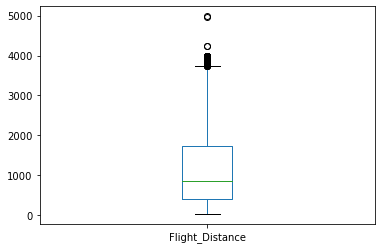

In [38]:
data['Flight_Distance'].plot(kind = 'box')

11) Display a boxplot for Checkin_service

<AxesSubplot:>

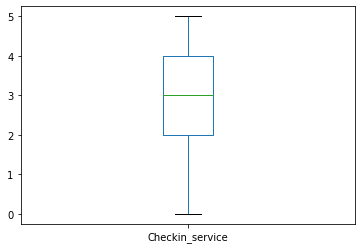

In [39]:
data['Checkin_service'].plot(kind = 'box')

12) Find all the Null values 

In [40]:
data.isnull().sum()

id                                    0
Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure/Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On-board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             26
satisfaction                          0
dtype: int64

13) Drop all the na values 

In [41]:
data = data.dropna(axis = 0)

In [42]:
data.isnull().sum()

id                                   0
Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

14) Find the unique values in Flight_Distance

In [45]:
data['Flight_Distance'].unique()

array([ 460,  235, 1142, ..., 3033, 1319, 1443], dtype=int64)

# Part-2: Working with Models 

1) Perform encoding in columns Gender, Customer_Type, Type_of_Travel, and Class. 

In [47]:
labelencoder = LabelEncoder()

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
data[['Gender','Customer_Type','Type_of_Travel','Class']] = data[['Gender','Customer_Type','Type_of_Travel','Class']].apply(labelencoder.fit_transform)

2) Drop the column id 

In [52]:
data = data.drop("id",axis = 1)

In [53]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             9974 non-null   int64  
 1   Customer_Type                      9974 non-null   int64  
 2   Age                                9974 non-null   int64  
 3   Type_of_Travel                     9974 non-null   int64  
 4   Class                              9974 non-null   int64  
 5   Flight_Distance                    9974 non-null   int64  
 6   Inflight_wifi_service              9974 non-null   int64  
 7   Departure/Arrival_time_convenient  9974 non-null   int64  
 8   Ease_of_Online_booking             9974 non-null   int64  
 9   Gate_location                      9974 non-null   int64  
 10  Food_and_drink                     9974 non-null   int64  
 11  Online_boarding                    9974 non-null   int64

3) Create the features and target Data 

In [56]:
Y = data['satisfaction']
X = data.drop(['satisfaction'],axis =1)

In [57]:
print("Shape of X:- ",X.shape)
print("Shape of Y:- ",Y.shape)

Shape of X:-  (9974, 22)
Shape of Y:-  (9974,)


4) Perform scaling on features data.

In [58]:
from sklearn.preprocessing import RobustScaler

In [59]:
Ro_scaler = RobustScaler() 

In [60]:
X_scale= Ro_scaler.fit_transform(X)

5) Fit the decision tree model with various parameters.

In [61]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 12,    
             'max_features': "sqrt",
            'min_samples_leaf':1,
             'min_samples_split':2,
            'criterion':'gini'}

model_dt = DecisionTreeClassifier(**params_dt)

6) Split the data in training and testing sets.

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scale,Y,test_size=0.2,random_state=10)

In [66]:
print("Shape of Training data for X:- ",X_train.shape)
print("Shape of Training data for Y:- ",Y_train.shape)
print("Shape of Testing data for X:- ",X_test.shape)
print("Shape of Testing data for Y:- ",Y_test.shape)

Shape of Training data for X:-  (7979, 22)
Shape of Training data for Y:-  (7979,)
Shape of Testing data for X:-  (1995, 22)
Shape of Testing data for Y:-  (1995,)


7) Create a function to display precision score, recall score, accuracy, classification report, confusion matrix, F1 Score.

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

In [71]:
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Pricison_score: ",precision_score(y_test, y_pred))
    print("\n")
    print("Recall_score: ",recall_score(y_test, y_pred))
    print("\n")
    print("Accuracy = {}".format(accuracy))
    print("\n")
    print("Classification Report:- ")
    print(classification_report(y_test,y_pred,digits=5))
    print("\n")
    print("Confusion Matrix:- ")
    print(confusion_matrix(y_test,y_pred))

In [72]:
run_model(model_dt,X_train, Y_train, X_test, Y_test)

Pricison_score:  0.8985330073349633


Recall_score:  0.8708530805687204


Accuracy = 0.9037593984962407


Classification Report:- 
              precision    recall  f1-score   support

           0    0.90739   0.92789   0.91753      1151
           1    0.89853   0.87085   0.88448       844

    accuracy                        0.90376      1995
   macro avg    0.90296   0.89937   0.90100      1995
weighted avg    0.90364   0.90376   0.90354      1995



Confusion Matrix:- 
[[1068   83]
 [ 109  735]]
